<h1 style="text-align:center;"> TP3 : Introduction à la classification </h1>

### Importation de bibliothèques et chargement de données

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
Y = iris.target

## Plus Proche Voisin
***

<p>
L’algorithme du Plus Proche Voisin est un algorithme très simple de classification qui
repose sur le principe suivant : la classe de chaque donnée de test (à classer) doit être la
classe de la donnée la plus proche (le plus similaire) parmi les données d’apprentissage.
</p>

Liste de fonctions utiles :

- **metrics.pairwise.euclidean_distances :** calcule des distances entre données.
- **argsort, argmin, argmax :** renvoie les indices des valeurs ordonnées, minimales et maximales.
- **neighbors.KNeighborsClassifier :** l’algorithme des K Plus Proches Voisins de sklearn.

### 1. Créez une fonction PPV(X,Y) qui prend en entrée des données X et des étiquettes Y et qui renvoie une étiquette, pour chaque donnée, prédite à partir du plus proche voisin de cette donnée. Ici on prend chaque donnée, une par une, comme donnée de test et on considère toutes les autres comme données d’apprentissage. Cela nous permet de tester la puissance de notre algorithme selon une méthode de validation par validation croisée (cross validation) de type “leave one out”.

Pour appliquer cette méthode, les étapes à suivre sont les suivantes :

1. Charger les données
2. Initialiser k au nombre de plus proches voisins choisi
3. Pour chaque exemple dans les données:<br>
3.1 Calculer la distance entre notre requête et l’observation itérative actuelle de la boucle depuis les données.<br>
3.2 Ajouter la distance et l’indice de l’observation concernée à une collection ordonnée de données<br>
4. Trier cette collection ordonnée contenant distances et indices de la plus petite distance à la plus grande (dans ordre croissant).
5. Sélectionner les k premières entrées de la collection de données triées (équivalent aux k plus proches voisins)
6. Obtenir les étiquettes des k entrées sélectionnées
7. Si régression, retourner la moyenne des k étiquettes
8. Si classification, retourner le mode (valeur la plus fréquente/commune) des k étiquettes

In [3]:
from sklearn.metrics.pairwise import euclidean_distances

def PPV(X,Y):
    Yhat = np.zeros(len(X))
    # Pour chaque observation des données
    for index, x in enumerate(X):
        # supprimer la variable des données d’apprentissage
        X_train = np.delete(X, index, 0)
        # supprimer la classe de la variable des données d’apprentissage
        Y_train = np.delete(Y, index, 0)

        # Calculer la distance entre notre requête et l'observation itérative actuelle
        # de la boucle depuis les données et chaque donnees qui rest .
        distance = euclidean_distances(X_train, [x])

        # Sélectionner la classe des données les plus proches
        min_dist_idx = np.argmin(distance)

        Yhat[index] = Y_train[min_dist_idx]
    
    return Yhat

PPV(X,Y)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

### 2. La fonction PPV calcule une étiquette prédite pour chaque donnée. Modifiez la fonction pour calculer et renvoyer l’erreur de prédiction : c’est à dire le pourcentage d’étiquettes mal prédites.

In [12]:
def error(Y, Yhat):
    cmp = 0
    for y, yh in zip(Y, Yhat):
        if y != yh:
            cmp += 1

    erreur_en_pourcentage = float(cmp*100) / float(len(Y))
    erreur = float(cmp) / float(len(Y))
    return erreur_en_pourcentage

In [13]:
def PPV(X, Y):
    Yhat = np.zeros(len(X))
    # Pour chaque observation des données
    for index, x in enumerate(X):
        # supprimer la variable des données d’apprentissage
        X_train = np.delete(X, index, 0)
        # supprimer la classe de la variable des données d’apprentissage
        Y_train = np.delete(Y, index, 0)

        # Calculer la distance entre notre requête et l'observation itérative actuelle
        # de la boucle depuis les données et chaque donnees qui rest .
        distance = euclidean_distances(X_train, [x])

        # Sélectionner la classe des données les plus proches
        min_dist_idx = np.argmin(distance)

        Yhat[index] = Y_train[min_dist_idx]
        erreur = error(Y, Yhat)

    return erreur, Yhat
PPV(X,Y)

(4.0,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]))

### 3. Testez sur les données Iris.

In [17]:
print('le pourcentage d’étiquettes mal prédites pour les données Iris est : ',PPV(X,Y)[0],'%')

le pourcentage d’étiquettes mal prédites pour les données Iris est :  4.0 %


### 4. Testez la fonction des K Plus Proches Voisins de sklearn (avec ici K = 1). Les résultats sont-ils différents ? Testez avec d’autres valeurs de K.

100%|█████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 324.71it/s]


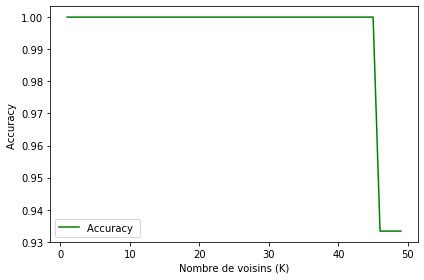

La meilleure précision était  1.0 avec k= 1


In [28]:
from sklearn.model_selection import train_test_split
import random
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier

def bestK_KNN(X_train, y_train, X_test, y_test):
    Ks = 50
    mean_acc = np.zeros((Ks-1))
    for n in tqdm(range(1,Ks)):
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        mean_acc[n-1] = neigh.score(X_test, y_test)

    plt.plot(range(1,Ks),mean_acc,'g')
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Nombre de voisins (K)')
    plt.tight_layout()
    plt.show()
    print( "La meilleure précision était ", mean_acc.max(), "avec k=", mean_acc.argmax()+1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random.seed())

bestK_KNN(X_train, y_train, X_test, y_test)

In [34]:
def KNN(X, Y, k):
    KNN = KNeighborsClassifier(n_neighbors = k)

    Yhat = []
    for index, x in enumerate(X):
        X_train = np.delete(X, index, 0)
        Y_train = np.delete(Y, index, 0)

        KNN.fit(X_train, Y_train)
        
        Yhat.append(KNN.predict( [x] ))

    return error(Y, Yhat), Yhat

print('le pourcentage d’étiquettes mal prédites pour les données Iris avec K=1 est : ',KNN(X, Y, 1)[0],'%')

le pourcentage d’étiquettes mal prédites pour les données Iris avec K=1 est :  4.0 %


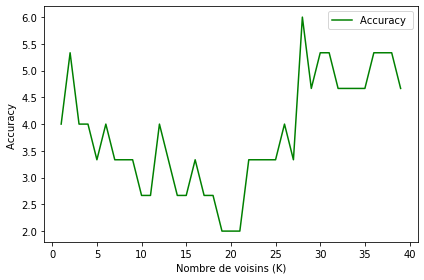

L'erreur minimale était 2.0 % avec k= 19


In [32]:
Ks = 40
errors = []
for i in range(1,Ks):
    errors.append( KNN(X,Y,i)[0] )

plt.plot(range(1,Ks), errors,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Nombre de voisins (K)')
plt.tight_layout()
plt.show()
print( "L'erreur minimale était", np.min(errors), "% avec k=", np.argmin(errors)+1) 

### 5. BONUS : Modifiez la fonction PPV pour qu’elle prenne en entrée un nombre K de voisins (au lieu de 1). La classe prédite sera alors la classe majoritaire parmi les K voisins.

In [37]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy import stats

def PPV2(X, Y, k=10):
    Yhat = np.zeros(len(X))
    # 3. Pour chaque observation des données
    for index, x in enumerate(X):
        #delete variable from training data
        X_train = np.delete(X, index, 0)
        #delete variable classe name from training targets
        Y_train = np.delete(Y, index, 0)

        # 3.Calculer la distance entre notre requête et l'observation itérative actuelle
        # de la boucle depuis les données et chaque donnees qui rest .
        distance = np.array(euclidean_distances(X_train, [x]).flatten())

        # 4. Trier cette collection ordonnée contenant distances et indices de
        # la plus petite distance à la plus grande (dans l'ordre croissant)
        sort_dist_id = distance.argsort()

        # 5. Sélectionner les k premières entrées de la précédente collection de données : sort_dist_id[:k]
        # 6. Obtenir les étiquettes des k entrées sélectionnées : [ Y_train[i] for i in sort_dist_id[:k] ]
        Yhat[index] = stats.mode( [ Y_train[i] for i in sort_dist_id[:k] ] )[0][0]
            
    return error(Y,Yhat), Yhat

PPV2(X,Y)[0]



2.0

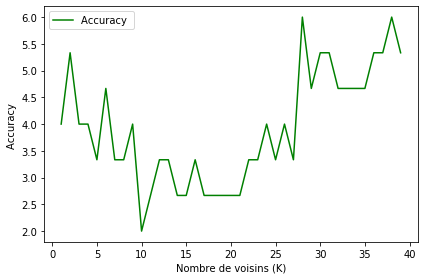

L'erreur minimale était  2.0 avec k= 10


5.333333333333333

In [40]:
errors = []
Ks = 40
for i in range(1, Ks):
    er = PPV2(X, Y, i)[0]
    errors.append(er)

plt.plot(range(1, Ks), errors,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Nombre de voisins (K)')
plt.tight_layout()
plt.show()
print( "L'erreur minimale était ", np.min(errors), "avec k=", np.argmin(errors)+1) 

PPV2(X, Y, 2)[0]

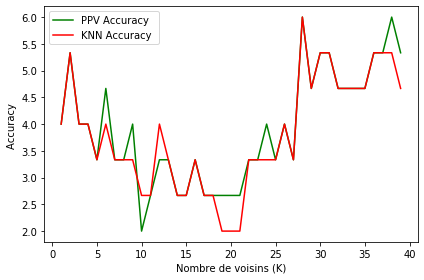

In [41]:
Ks = 40
errors1 = []
errors2 = []
for i in range(1, Ks):
    errors1.append( PPV2(X, Y, i)[0] )
    errors2.append( KNN(X, Y, i)[0] )

plt.plot(range(1, Ks), errors1,'g')
plt.plot(range(1, Ks), errors2,'r')
plt.legend(('PPV Accuracy', 'KNN Accuracy '))

plt.ylabel('Accuracy ')
plt.xlabel('Nombre de voisins (K)')
plt.tight_layout()
plt.show()

## Classifieur Bayesien Naïf
***

<p>
L’algorithme du Classifieur Bayesien Naïf est un algorithme de classification basé sur le calcul de probabilité d’appartenance à chaque classe. C’est à dire que la donnée de test (à classer) sera affectée à la classe la plus probable. Les probabilités d’appartenances à chaque classe sont calculés à partir des données d’apprentissage de la façon suivante :
</p>

<p style="text-align:center;"> <strong> classe(x) = argmax wk { |^| P(xi/wk)P(wk) } </strong> </p>

<p>
Ici P(Wk) est la probabilité à priori d’appartenir à la classe k. autrement dit c’est la probabilité d’obtenir une donnée de la classe k si on tire une donnée au hasard. P(xi=Wk) est la probabilité qu’une donnée x ait la valeur xi pour la variable i, si on connaît sa classe !k. Pour chaque classe k, cette probabilité peut se calculer comme 1 􀀀 dxk = P dxb, avec dxk la distance entre la donnée x et le barycentre de k (c’est à dire la moyenne de la classe), et P dxb la somme des distances entre cette donnée et chaque barycentre de chaque classe.
</p>

Liste de fonctions utiles :

- **mean, sum :** calculent la moyenne et la somme d’une liste de valeur.
- **unique :** renvoie la liste des valeurs d’une liste, mais sans répétitions de valeurs.
- **asarray :** transforme une liste en vecteur.
- **nom_d_un_vecteur.prod :** fait le produit des valeurs d’un vecteur.
- **naive_bayes.GaussianNB :** l’algorithme du Classifieur Bayesien Naïf de sklearn.



### 1. Créez une fonction CBN(X,Y) qui prend en entrée des données X et des étiquettes Y et qui renvoie une étiquette, pour chaque donnée, prédite à partir de la classe la plus probable selon l’équation (1). Ici encore, on prend chaque donnée, une par une, comme donnée de test et on considère toutes les données comme données d’apprentissage. Il est conseillé de calculer d’abord les barycentres et les probabilités à priori P(!k) pour chaque classe, puis de calculer les probabilités conditionnelles P(xi=!k) pour chaque classe et chaque variable

In [57]:

def CBN(X, Y):
    Yhat = []

    for index, x in enumerate(X):
        X_train = np.delete(X, index, 0)
        Y_train = np.delete(Y, index, 0)

        proba_xk_sachant_wi = []
        all_k_id = [ [ i for i, y in enumerate(Y_train) if y == k] for k in np.unique( Y_train ) ]

        barycentre_b = [ np.mean( a = [ X_train[i] for i in ids ], axis = 0 )  for ids in all_k_id ]
        # dist_x_b = [ abs(var - barycentre) for var , barycentre in zip(x, barycentre_b) ]
        dist_x_b = np.absolute(np.array(x) - barycentre_b)
        # print(dist_x_b)
        sum_dist_x_b = np.sum( dist_x_b , axis = 0 )
        # print(sum_dist_x_b)
        # break
        for k_id in all_k_id:
            proba_classes = list( Y_train ).count( Y_train[k_id[0]] ) / float(len(X))
            # print(proba_classes)
            barycentre_k = np.mean( a = [ X_train[i] for i in k_id ], axis = 0 )
            # print(barycentre_k)
            # dist_x_k =  [ abs(var - barycentre) for var , barycentre in zip(x, barycentre_k) ]
            dist_x_k = np.absolute(np.array(x) - barycentre_k)
            # print(dist_x_k)
            
            proba_xi_sachant_wk = 1 - (dist_x_k  / sum_dist_x_b )
            # print(proba_xi_sachant_wk)

            produit = np.multiply(proba_xi_sachant_wk, proba_classes).prod()
            proba_xk_sachant_wi.append( produit )

        prod_max_id = np.asarray(proba_xk_sachant_wi).argmax()
        # print(nom_d_un_vecteur.prod())
         
        Yhat.append( Y_train[ all_k_id[prod_max_id][0] ] )
        # break
    return Yhat

### 2. La fonction CBN calcule une étiquette prédite pour chaque donnée. Modifiez la fonction pour calculer et renvoyer l’erreur de prédiction : c’est à dire le pourcentage d’étiquettes mal prédites. Testez sur les données Iris.

In [58]:
Yhat = CBN(X, Y)
print('le pourcentage d’étiquettes mal prédites est : ',error(Y, Yhat),'%')


le pourcentage d’étiquettes mal prédites est :  14.666666666666666 %


In [59]:
from sklearn import metrics
print(metrics.classification_report( Y, Yhat))
print('La matrice de confusion:')
print(metrics.confusion_matrix( Y, Yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.76      0.82      0.79        50
           2       0.80      0.74      0.77        50

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150

La matrice de confusion:
[[50  0  0]
 [ 0 41  9]
 [ 0 13 37]]


### 3. Testez la fonction du Classifieur Bayesien Naïf inclut dans sklearn. Cette fonction utilise une distribution Gaussienne au lieu des distances aux barycentres. Les résultats sont-ils différents ?

In [60]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
Yhat = []
for index, x in enumerate(X):
    X_train = np.delete(X, index, 0)
    Y_train = np.delete(Y, index, 0)

    model.fit( X_train, Y_train)
    Yhat.append( model.predict([x]) )

print('le pourcentage d’étiquettes mal prédites est : ',error(Y, Yhat),'%')

le pourcentage d’étiquettes mal prédites est :  4.666666666666667 %


In [61]:
from sklearn import metrics
print(metrics.classification_report( Y, Yhat))
print('La matrice de confusion:')
print(metrics.confusion_matrix( Y, Yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

La matrice de confusion:
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]


Nous remarquons que Les résultats sont différents, avec la fonction CBN nous avons obtenus une erreur de 14.66 % et avec la fonction du Classifieur Bayesien Naïf inclut dans sklearn nous avons obtenus une erreur de 4.66 %

***
### Links
- [E-mail :](mailto:zakaria.abbou199434@gmail.com) zakaria.abbou199434@gmail.com
- [GitHub :](https://github.com/ZakariaAABBOU) github.com/ZakariaAABBOU
- [Linkedin :](https://www.linkedin.com/in/zakaria-aabbou/) linkedin.com/in/zakaria-aabbou/